In [32]:
import pandas as pd
import numpy as np


import pandas_datareader as pdr 
from datetime import datetime 

import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
from porfolio_functions import *

In [34]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

# İgnore the Warnings
import warnings
warnings.filterwarnings("ignore")

In [35]:
bist_list=pd.read_csv("bist100_companny")
bist_list.head(2)

,Unnamed: 0,CODE,COMPANY,yahoo_code,Sektör,Piyasa Değeri(mn TL),Piyasa Değeri(mn $),Halka AçıklıkOranı (%),Sermaye(mn TL)
0,0,AEFES,ANADOLU EFES BIRACILIK VE,AEFES.IS,Meşrubat / İçecek,14921.1,1797.4,32.9,592.1
1,1,AKBNK,AKBANK T.A.S.,AKBNK.IS,Bankacılık,26208.0,3157.0,50.6,5200.0


In [36]:
stock=pdr.get_data_yahoo(symbols="SISE.IS", start=datetime(2016, 1, 1), end=datetime(2020, 12,31))

In [37]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,2.693778,2.693778,2.693778,2.693778,0.0,2.302052
2016-01-04,2.685334,2.584000,2.634667,2.609334,5615538.0,2.229888
2016-01-05,2.634667,2.508000,2.626223,2.575556,10270960.0,2.201022
2016-01-06,2.592445,2.482667,2.575556,2.499556,10544792.0,2.136074
2016-01-07,2.524889,2.406667,2.465778,2.508000,10516822.0,2.143290


# **Part-1** :Univariate Investment Risk and Returns

* ### *Financial Returns*
* ### *Moments of Distribution*(Mean, Variance,Skewnes, Kurtosis)
* ### *Test of Normality*

## *Financial Returns*

### Calculate the Daily Return of adjusted Close price

In [38]:
stock["Returns"] = stock["Adj Close"].pct_change()

In [39]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2016-01-01,2.693778,2.693778,2.693778,2.693778,0.0,2.302052,NaN
2016-01-04,2.685334,2.584000,2.634667,2.609334,5615538.0,2.229888,-0.031348
2016-01-05,2.634667,2.508000,2.626223,2.575556,10270960.0,2.201022,-0.012945
2016-01-06,2.592445,2.482667,2.575556,2.499556,10544792.0,2.136074,-0.029508
2016-01-07,2.524889,2.406667,2.465778,2.508000,10516822.0,2.143290,0.003378


### Visualizing Returns

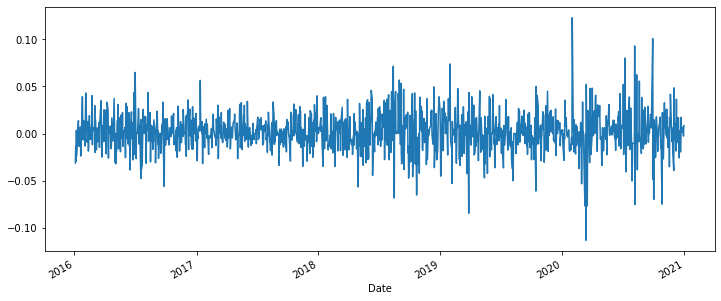

In [40]:
# Plot returns
fig, ax=plt.subplots(figsize=(12,5))
stock["Returns"].plot();

<AxesSubplot:xlabel='Date'>

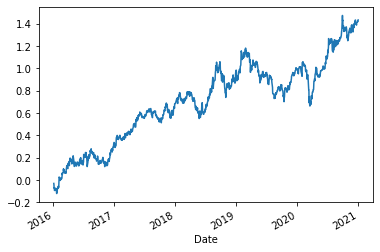

In [41]:
stock["Returns"].cumsum().plot()

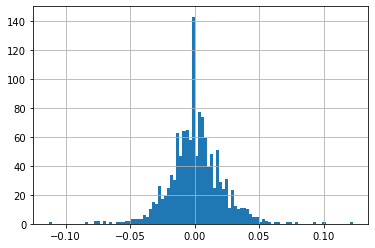

In [42]:
# Plot Resturns dispersion 
stock["Returns"].hist(bins=100, density=False); # density =False : Frequency; density = True: Probablity

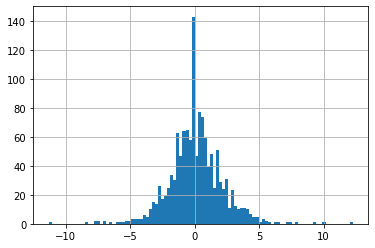

In [43]:
# Plot Retuns dispersion as a percentage, (fallow the x-axis)
(stock["Returns"]*100).hist(bins=100, density=False);

## *Moments of Distribution*
*Daily **variance** and **mean** give us a good indication of daily risk and return, But **skewnes** amd **kurtosis** and **scaled volatility** will help us build a holistic view of risk*
* **Mean**
* **Varience**
* **Skewness**
* **Kurtosis**

### *1-* Mean of Returns

In [44]:
# Mean of the Returns
# np.mean(stock["Returns"])
stock["Returns"].mean()

0.0011079939011606986

In [45]:
# Calculate the avarage annuized return assuming 260 days in a year
#((1+np.mean(stock["Returns"]))**260)-1
((1+stock["Returns"].mean())**260)-1

0.3336491908404655

### *2-* Stadart Deviation and Varience

* std_annualy = std_daily*np.sqrt(260)
* std_montly = std_daily*np.sqrt(21)

#### Standart Deviation

In [46]:
# np.std(stock["Returns"])
stock["Returns"].std()

0.020551536398770356

In [47]:
# annualy standart deviation
(stock["Returns"].std())*np.sqrt(260)

0.33138356714085193

#### Variance

In [48]:
# to calculate the variance, square the standart deviation 
stock["Returns"].std()**2

0.0004223656483499828

In [49]:
# annuzalized Varience 
((stock["Returns"].std())*np.sqrt(260))**2

0.10981506857099552

<AxesSubplot:xlabel='Date'>

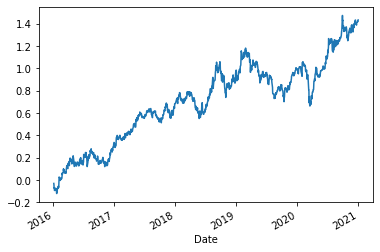

In [50]:
stock["Returns"].cumsum().plot()

### *3-* Skewness
* It is a measure of how mcuh a distrubion leans to left or right
* Tend to be grather than 0 (Positive Skewness) for stock returns; But for  normal distrbituon, tend to be 0
* Negative Skewness is a right-leaning curve; Positive Skewness is a left-leaning curve

In [51]:
from scipy.stats import skew
skew(stock["Returns"].dropna())

0.07953988703285678

### *4-* Kurtosis
* It is a measure of thickness of the tails of a distrubiton
* normal distrubion Tends to be 3; for the stock price tend to be gather than 3 or 
* High excess kurtosis is an indication of high risk

In [52]:
from scipy.stats import kurtosis
kurtosis(stock["Returns"].dropna())

3.240322114762196

## *Test fo Normallity*
* **If the Kurtosi of a distribution is grather than 3 and the skewness is non-zero, than the data is most likely non-normal**
* **Shapiro-Wilk test**
* **H0 : data is normal distributed**

In [53]:
from scipy import stats
p_value = stats.shapiro(stock["Returns"].dropna())[1]

if p_value < 0.05:
    print("H0 is rejected")
    print("Data is not normal distribution")
else:
    print("Ho is accepted")
    print("Data does not conform to the normal distribution")


H0 is rejected
Data is not normal distribution


# **Part-2:** Portfolio Investing

* ### *Portfolio composition and backtesting*
* ### *Correlation and co-variance*
* ### *Markowitz portfolios*

## *Portfolio Composition and Backtesting*
* **Diffirent Wegihted Portfoilo**
* **Equal Weighted Portfolio**
* **Maket Capitalisation Weighted Portfolio**

### Creating Portfolio ( Data Set)

In [54]:
bist=pd.read_csv("bist100_list")
stock_list=bist.loc[[1,3,13,25,34,41,65,86,95,98],"yahoo_code"]


In [55]:
portfolio=pd.DataFrame()
for stock in stock_list:
    portfolio[stock]=pdr.get_data_yahoo(symbols=stock, start=datetime(2019, 1, 1), end=datetime(2019, 12,31))["Adj Close"]

In [56]:
portfolio.head()

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS
Date,,,,,,,,,,
2019-01-01,5.744415,2.69,39.651924,3.442754,2.12,2.97,50.349998,5.402646,16.10,12.244567
2019-01-02,5.468483,2.58,38.618721,3.379293,2.10,2.86,50.250000,5.158352,15.68,11.766094
2019-01-03,5.402471,2.53,39.491203,3.315832,2.10,2.69,51.599998,4.932851,15.15,11.222374
2019-01-04,5.714527,2.61,39.674889,3.323764,2.21,2.71,52.099998,4.904663,15.09,11.367366
2019-01-07,5.792541,2.61,39.789688,3.323764,2.15,2.73,53.650002,5.036206,15.06,11.824090


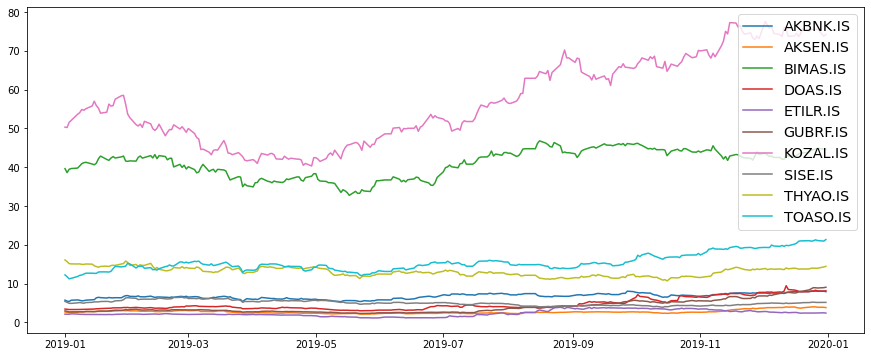

In [57]:
# Plotting all stocks's adj close price
fig, ax=plt.subplots(figsize=(15,6))
for i in range(10):
    ax.plot(portfolio.iloc[:,i], label=portfolio.columns[i]);
    ax.legend(fontsize="x-large")

In [58]:
# Calculate Daily Return
return_daily = portfolio.pct_change()

In [59]:
return_daily.head()

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS
Date,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,-0.048035,-0.040892,-0.026057,-0.018433,-0.009434,-0.037037,-0.001986,-0.045217,-0.026087,-0.039076
2019-01-03,-0.012071,-0.019380,0.022592,-0.018779,0.000000,-0.059441,0.026866,-0.043716,-0.033801,-0.046211
2019-01-04,0.057762,0.031621,0.004651,0.002392,0.052381,0.007435,0.009690,-0.005714,-0.003960,0.012920
2019-01-07,0.013652,0.000000,0.002894,0.000000,-0.027149,0.007380,0.029751,0.026820,-0.001988,0.040179


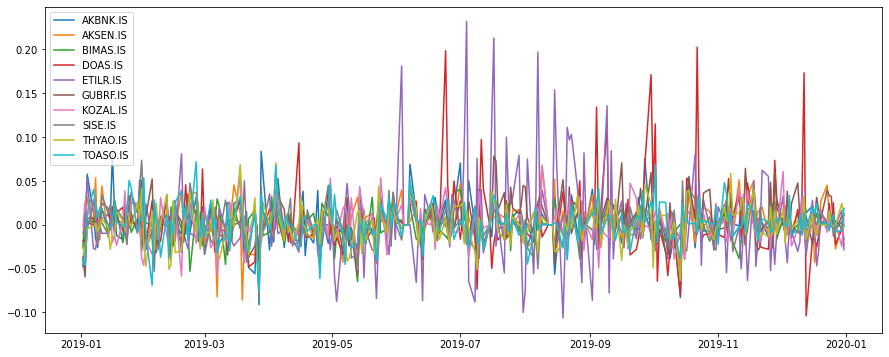

In [60]:
# Ploting All Stocks's Daily Return
fig, ax=plt.subplots(figsize=(15,6))
for i in range(10):
    ax.plot(return_daily.iloc[:,i], label=return_daily.columns[i]);
    ax.legend(fontsize=10,loc=2)

### Diffirent Weighted Porfolio

In [61]:
# Stock Weights in Portfolio
portfolio_weights = np.array([0.12, 0.13, 0.08, 0.05, 0.09, 0.10, 0.11, 0.12, 0.14,0.06])

In [62]:
# Calculate the portfolio returns 
portfolio_returns = return_daily.mul(portfolio_weights, axis=1).sum(axis=1)

In [63]:
# Assign portfolio_retuns to Portfoliı_Ret column 
return_daily["Portfolio_Ret"]=portfolio_returns

In [64]:
return_daily.head()

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS,Portfolio_Ret
Date,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2019-01-02,-0.048035,-0.040892,-0.026057,-0.018433,-0.009434,-0.037037,-0.001986,-0.045217,-0.026087,-0.039076,-0.030280
2019-01-03,-0.012071,-0.019380,0.022592,-0.018779,0.000000,-0.059441,0.026866,-0.043716,-0.033801,-0.046211,-0.018839
2019-01-04,0.057762,0.031621,0.004651,0.002392,0.052381,0.007435,0.009690,-0.005714,-0.003960,0.012920,0.017593
2019-01-07,0.013652,0.000000,0.002894,0.000000,-0.027149,0.007380,0.029751,0.026820,-0.001988,0.040179,0.008788


### Equaly Weighted Portfolio

In [65]:
# Stock weights in Portfolio ( Equal weights)
numstock=10 # Number of stcok in portfolio
portfolio_weights_ew=np.repeat(1/numstock,numstock)

In [66]:
# Calculate the Portfolio retuns 
portfolio_returns_ew = return_daily.iloc[:,0:numstock].mul(portfolio_weights_ew,axis=1).sum(axis=1)

In [67]:
# Assign portfolio_retursn_ew to Portfolio_Ret_ew column 
return_daily["Portfolio_Ret_ew"] = portfolio_returns_ew

In [68]:
return_daily.tail()

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS,Portfolio_Ret,Portfolio_Ret_ew
Date,,,,,,,,,,,,
2019-12-25,0.001216,0.007538,0.003866,-0.002088,0.008368,0.032295,-0.000661,0.011278,0.000000,0.005287,0.006911,0.006710
2019-12-26,0.004860,0.000000,0.002567,0.025105,0.008299,-0.002235,0.000000,-0.013011,-0.002144,0.011270,0.001382,0.003471
2019-12-27,-0.004837,-0.027431,0.004695,-0.022449,0.000000,-0.006719,0.001324,-0.003766,0.000000,-0.008172,-0.006362,-0.006736
2019-12-30,0.003645,0.000000,-0.004248,-0.005219,0.016461,0.010147,-0.024455,0.003781,0.024355,-0.006742,0.003102,0.001773
2019-12-31,-0.016949,-0.023077,-0.001707,0.011983,-0.028340,0.011161,0.006098,0.000000,0.011189,0.018854,-0.002637,-0.001079


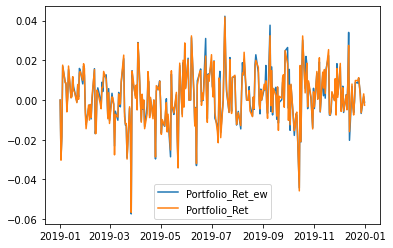

In [69]:
for i in [1,2]:
    plt.plot(return_daily.iloc[:,-i],label=return_daily.columns[-i])
    plt.legend()

### Market-capt weighted portfolios

In [70]:
# Stock weights in portfolio (market_cap weighted)
market_capt=[bist_list[bist_list["yahoo_code"]==i].iloc[0,5]  for i in portfolio.columns]
portfolio_weights_mc =market_capt/np.sum(market_capt)

In [71]:
portfolio_weights_mc

array([0.14827454, 0.0447511 , 0.22295098, 0.03574702, 0.00162939,
       0.11649634, 0.10983281, 0.1327512 , 0.10423008, 0.08333654])

In [72]:
# Calculate the portfolio returns 
portfolio_Ret_mc = return_daily.iloc[:,0:10].mul(portfolio_weights_mc, axis=1).sum(axis=1)

In [73]:
# Assign portfolio_returns_mc to "portfolio_returns_mc " column
return_daily["Portfolio_Ret_mc"] = portfolio_Ret_mc

In [74]:
return_daily.head()

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS,Portfolio_Ret,Portfolio_Ret_ew,Portfolio_Ret_mc
Date,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2019-01-02,-0.048035,-0.040892,-0.026057,-0.018433,-0.009434,-0.037037,-0.001986,-0.045217,-0.026087,-0.039076,-0.030280,-0.029225,-0.031947
2019-01-03,-0.012071,-0.019380,0.022592,-0.018779,0.000000,-0.059441,0.026866,-0.043716,-0.033801,-0.046211,-0.018839,-0.018394,-0.015443
2019-01-04,0.057762,0.031621,0.004651,0.002392,0.052381,0.007435,0.009690,-0.005714,-0.003960,0.012920,0.017593,0.016918,0.013023
2019-01-07,0.013652,0.000000,0.002894,0.000000,-0.027149,0.007380,0.029751,0.026820,-0.001988,0.040179,0.008788,0.009154,0.013454


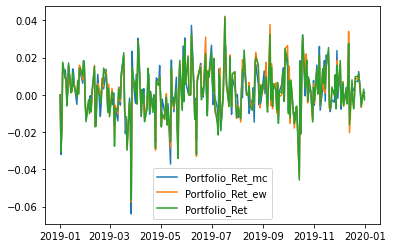

In [75]:
for i in [1,2,3]:
    plt.plot(return_daily.iloc[:,-i],label=return_daily.columns[-i])
    plt.legend()

### Plotting Portfolio Cumulative Returns

In [76]:
Cumulative_Returns=(1+return_daily).cumprod()-1

In [77]:
Cumulative_Returns.head()

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS,Portfolio_Ret,Portfolio_Ret_ew,Portfolio_Ret_mc
Date,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2019-01-02,-0.048035,-0.040892,-0.026057,-0.018433,-0.009434,-0.037037,-0.001986,-0.045217,-0.026087,-0.039076,-0.030280,-0.029225,-0.031947
2019-01-03,-0.059526,-0.059480,-0.004053,-0.036866,-0.009434,-0.094276,0.024826,-0.086957,-0.059006,-0.083481,-0.048549,-0.047082,-0.046896
2019-01-04,-0.005203,-0.029740,0.000579,-0.034562,0.042453,-0.087542,0.034757,-0.092174,-0.062733,-0.071640,-0.031811,-0.030961,-0.034484
2019-01-07,0.008378,-0.029740,0.003474,-0.034562,0.014151,-0.080808,0.065541,-0.067826,-0.064596,-0.034340,-0.023303,-0.022091,-0.021494


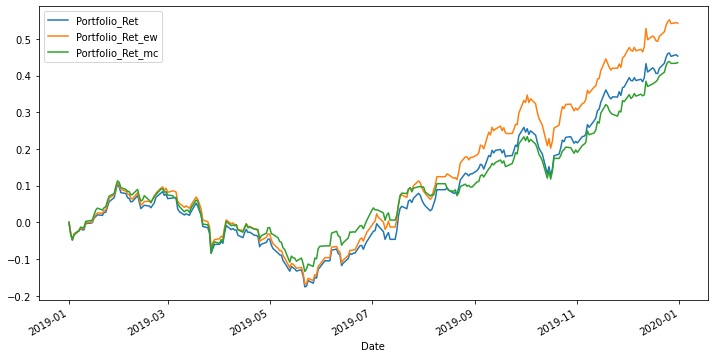

In [78]:
Cumulative_Returns[["Portfolio_Ret","Portfolio_Ret_ew","Portfolio_Ret_mc"]].plot(figsize=(12,6));

In [79]:
df = pd.read_excel("temelozet.xlsx")

In [80]:
print(portfolio_weights)
print(portfolio_weights_ew)
print(portfolio_weights_mc)

[0.12 0.13 0.08 0.05 0.09 0.1  0.11 0.12 0.14 0.06]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.14827454 0.0447511  0.22295098 0.03574702 0.00162939 0.11649634
 0.10983281 0.1327512  0.10423008 0.08333654]


In [81]:
# Plot Wegiths
plt.plot(portfolio_weights)
plt.plot(portfolio_weights_ew)
plt.plot(portfolio_weights_mc)de
plt.legend()

SyntaxError: invalid syntax (<ipython-input-81-bf1f6c27e062>, line 4)

## *Correlation and co-variance*
* **Corelation Matrix**
* **Co-Varinca Matrix**
* **Potrfolio Standart Deviation**

### Corelation Matrix

In [82]:
portfolio_Return = portfolio.pct_change()
portfolio_Return.head()

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS
Date,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,-0.048035,-0.040892,-0.026057,-0.018433,-0.009434,-0.037037,-0.001986,-0.045217,-0.026087,-0.039076
2019-01-03,-0.012071,-0.019380,0.022592,-0.018779,0.000000,-0.059441,0.026866,-0.043716,-0.033801,-0.046211
2019-01-04,0.057762,0.031621,0.004651,0.002392,0.052381,0.007435,0.009690,-0.005714,-0.003960,0.012920
2019-01-07,0.013652,0.000000,0.002894,0.000000,-0.027149,0.007380,0.029751,0.026820,-0.001988,0.040179


In [83]:
# Calculate the Corelation Matrix
corr_matrix=portfolio_Return.corr()
corr_matrix

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS
AKBNK.IS,1.000000,0.437203,0.237895,0.271754,-0.000807,0.358072,0.170138,0.461547,0.494532,0.375577
AKSEN.IS,0.437203,1.000000,0.066216,0.266972,0.112187,0.322949,0.195172,0.320784,0.387099,0.282267
BIMAS.IS,0.237895,0.066216,1.000000,0.091805,0.197840,0.139449,0.165838,0.181128,0.135731,0.243328
DOAS.IS,0.271754,0.266972,0.091805,1.000000,-0.008739,0.253716,0.142894,0.240352,0.297723,0.250102
ETILR.IS,-0.000807,0.112187,0.197840,-0.008739,1.000000,-0.035330,0.106394,0.051378,0.028259,0.031726
GUBRF.IS,0.358072,0.322949,0.139449,0.253716,-0.035330,1.000000,0.170979,0.365387,0.324088,0.179121
KOZAL.IS,0.170138,0.195172,0.165838,0.142894,0.106394,0.170979,1.000000,0.165513,0.225467,0.129891
SISE.IS,0.461547,0.320784,0.181128,0.240352,0.051378,0.365387,0.165513,1.000000,0.539201,0.418387
THYAO.IS,0.494532,0.387099,0.135731,0.297723,0.028259,0.324088,0.225467,0.539201,1.000000,0.322891
TOASO.IS,0.375577,0.282267,0.243328,0.250102,0.031726,0.179121,0.129891,0.418387,0.322891,1.000000


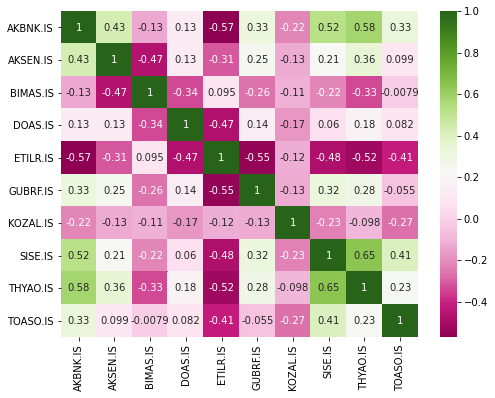

In [84]:
# Plotting Corelation Heatmap
plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix.corr(), annot=True,cmap="PiYG");

### Co-Varince Martix

In [85]:
# Calculate the Co-Variance Matrix
cov_matrix = portfolio_Return.cov()
cov_matrix

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS
AKBNK.IS,5.582268e-04,0.000223,0.000093,0.000233,-8.719115e-07,0.000195,0.000082,0.000225,0.000251,0.000191
AKSEN.IS,2.233485e-04,0.000468,0.000024,0.000210,1.108837e-04,0.000161,0.000086,0.000143,0.000180,0.000131
BIMAS.IS,9.292144e-05,0.000024,0.000273,0.000055,1.495101e-04,0.000053,0.000056,0.000062,0.000048,0.000087
DOAS.IS,2.330779e-04,0.000210,0.000055,0.001318,-1.450168e-05,0.000213,0.000106,0.000180,0.000232,0.000195
ETILR.IS,-8.719115e-07,0.000111,0.000150,-0.000015,2.089596e-03,-0.000037,0.000100,0.000049,0.000028,0.000031
GUBRF.IS,1.954915e-04,0.000161,0.000053,0.000213,-3.731928e-05,0.000534,0.000081,0.000174,0.000161,0.000089
KOZAL.IS,8.238633e-05,0.000086,0.000056,0.000106,9.967754e-05,0.000081,0.000420,0.000070,0.000099,0.000057
SISE.IS,2.253633e-04,0.000143,0.000062,0.000180,4.853634e-05,0.000174,0.000070,0.000427,0.000239,0.000186
THYAO.IS,2.510996e-04,0.000180,0.000048,0.000232,2.776128e-05,0.000161,0.000099,0.000239,0.000462,0.000149
TOASO.IS,1.909218e-04,0.000131,0.000087,0.000195,3.120264e-05,0.000089,0.000057,0.000186,0.000149,0.000463


In [86]:
# Calculate the Annual Co-Variance Matrix ( 260 stock exchange days in a year in Turkey )
cov_matrix_annual=cov_matrix*260
cov_matrix_annual

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS
AKBNK.IS,0.145139,0.058071,0.024160,0.060600,-0.000227,0.050828,0.021420,0.058594,0.065286,0.049640
AKSEN.IS,0.058071,0.121552,0.006154,0.054482,0.028830,0.041952,0.022487,0.037269,0.046767,0.034141
BIMAS.IS,0.024160,0.006154,0.071060,0.014325,0.038873,0.013851,0.014609,0.016090,0.012538,0.022503
DOAS.IS,0.060600,0.054482,0.014325,0.342620,-0.003770,0.055334,0.027641,0.046882,0.060388,0.050788
ETILR.IS,-0.000227,0.028830,0.038873,-0.003770,0.543295,-0.009703,0.025916,0.012619,0.007218,0.008113
GUBRF.IS,0.050828,0.041952,0.013851,0.055334,-0.009703,0.138828,0.021053,0.045367,0.041844,0.023154
KOZAL.IS,0.021420,0.022487,0.014609,0.027641,0.025916,0.021053,0.109212,0.018227,0.025820,0.014892
SISE.IS,0.058594,0.037269,0.016090,0.046882,0.012619,0.045367,0.018227,0.111045,0.062263,0.048369
THYAO.IS,0.065286,0.046767,0.012538,0.060388,0.007218,0.041844,0.025820,0.062263,0.120079,0.038818
TOASO.IS,0.049640,0.034141,0.022503,0.050788,0.008113,0.023154,0.014892,0.048369,0.038818,0.120358


### Portfolio Standart Deviation (Portfolio Volatility)

In [87]:
# Calculate the portfolio standard deviation (Portfolio Volatility)
# NOTE: I chose the portfolio weights which is calculated by market capitalisation rate
portfolio_volatility = np.sqrt(np.dot(portfolio_weights_mc.T, np.dot(cov_matrix_annual, portfolio_weights_mc)))
portfolio_volatility

0.20503106692304218

## *Markowitz portfolios*

In [88]:
risk_free=0.12

In [89]:
portfolio.head()

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS
Date,,,,,,,,,,
2019-01-01,5.744415,2.69,39.651924,3.442754,2.12,2.97,50.349998,5.402646,16.10,12.244567
2019-01-02,5.468483,2.58,38.618721,3.379293,2.10,2.86,50.250000,5.158352,15.68,11.766094
2019-01-03,5.402471,2.53,39.491203,3.315832,2.10,2.69,51.599998,4.932851,15.15,11.222374
2019-01-04,5.714527,2.61,39.674889,3.323764,2.21,2.71,52.099998,4.904663,15.09,11.367366
2019-01-07,5.792541,2.61,39.789688,3.323764,2.15,2.73,53.650002,5.036206,15.06,11.824090


In [90]:
portfolio_return=portfolio.pct_change()
portfolio_return.head()

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS
Date,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,-0.048035,-0.040892,-0.026057,-0.018433,-0.009434,-0.037037,-0.001986,-0.045217,-0.026087,-0.039076
2019-01-03,-0.012071,-0.019380,0.022592,-0.018779,0.000000,-0.059441,0.026866,-0.043716,-0.033801,-0.046211
2019-01-04,0.057762,0.031621,0.004651,0.002392,0.052381,0.007435,0.009690,-0.005714,-0.003960,0.012920
2019-01-07,0.013652,0.000000,0.002894,0.000000,-0.027149,0.007380,0.029751,0.026820,-0.001988,0.040179


In [91]:
# Calculate the Co-Variance Matrix
cov_matrix = portfolio_return.cov()
cov_matrix
# Calculate the Annual Co-Variance Matrix ( 260 stock exchange days in a year in Turkey )
cov_matrix_annual=cov_matrix*260
cov_matrix_annual

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS
AKBNK.IS,0.145139,0.058071,0.024160,0.060600,-0.000227,0.050828,0.021420,0.058594,0.065286,0.049640
AKSEN.IS,0.058071,0.121552,0.006154,0.054482,0.028830,0.041952,0.022487,0.037269,0.046767,0.034141
BIMAS.IS,0.024160,0.006154,0.071060,0.014325,0.038873,0.013851,0.014609,0.016090,0.012538,0.022503
DOAS.IS,0.060600,0.054482,0.014325,0.342620,-0.003770,0.055334,0.027641,0.046882,0.060388,0.050788
ETILR.IS,-0.000227,0.028830,0.038873,-0.003770,0.543295,-0.009703,0.025916,0.012619,0.007218,0.008113
GUBRF.IS,0.050828,0.041952,0.013851,0.055334,-0.009703,0.138828,0.021053,0.045367,0.041844,0.023154
KOZAL.IS,0.021420,0.022487,0.014609,0.027641,0.025916,0.021053,0.109212,0.018227,0.025820,0.014892
SISE.IS,0.058594,0.037269,0.016090,0.046882,0.012619,0.045367,0.018227,0.111045,0.062263,0.048369
THYAO.IS,0.065286,0.046767,0.012538,0.060388,0.007218,0.041844,0.025820,0.062263,0.120079,0.038818
TOASO.IS,0.049640,0.034141,0.022503,0.050788,0.008113,0.023154,0.014892,0.048369,0.038818,0.120358


In [111]:
# Creat random Portfolio weights set
RandomPortfolio=pd.DataFrame()
np.random.RandomState()
for i in range(5000):
    weight = np.random.random(10)
    weight /= np.sum(weight)
    RandomPortfolio.loc[i,portfolio.columns] = weight
RandomPortfolio.head()

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS
0,0.015232,0.178975,0.037762,0.019064,0.181553,0.079247,0.073883,0.072650,0.176639,0.164994
1,0.022460,0.100601,0.044026,0.049032,0.057808,0.134842,0.084863,0.230426,0.220934,0.055008
2,0.025054,0.116527,0.103579,0.115837,0.092275,0.133385,0.088288,0.062017,0.125612,0.137427
3,0.107746,0.113979,0.116720,0.016291,0.174056,0.104171,0.097688,0.068342,0.029098,0.171910
4,0.043970,0.131536,0.142874,0.133972,0.106197,0.098097,0.109686,0.021353,0.096918,0.115398


In [112]:
# Calculate RandomPortfolio Resturn
RandomPortfolio["Return"]=np.dot(RandomPortfolio,(portfolio_return.sum()))
RandomPortfolio.head()

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS,Return
0,0.015232,0.178975,0.037762,0.019064,0.181553,0.079247,0.073883,0.072650,0.176639,0.164994,0.394460
1,0.022460,0.100601,0.044026,0.049032,0.057808,0.134842,0.084863,0.230426,0.220934,0.055008,0.352127
2,0.025054,0.116527,0.103579,0.115837,0.092275,0.133385,0.088288,0.062017,0.125612,0.137427,0.504076
3,0.107746,0.113979,0.116720,0.016291,0.174056,0.104171,0.097688,0.068342,0.029098,0.171910,0.462049
4,0.043970,0.131536,0.142874,0.133972,0.106197,0.098097,0.109686,0.021353,0.096918,0.115398,0.502615


In [113]:
#Calculate RandomPortfolio Volatility
RandomPortfolio["Volatility"]=RandomPortfolio.apply(lambda x: 
                                                     np.sqrt(np.dot(x[0:10].T,np.dot(cov_matrix_annual,x[0:10]))) ,
                                                     axis =1)

In [114]:
RandomPortfolio.head()

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS,Return,Volatility
0,0.015232,0.178975,0.037762,0.019064,0.181553,0.079247,0.073883,0.072650,0.176639,0.164994,0.394460,0.235158
1,0.022460,0.100601,0.044026,0.049032,0.057808,0.134842,0.084863,0.230426,0.220934,0.055008,0.352127,0.224262
2,0.025054,0.116527,0.103579,0.115837,0.092275,0.133385,0.088288,0.062017,0.125612,0.137427,0.504076,0.215534
3,0.107746,0.113979,0.116720,0.016291,0.174056,0.104171,0.097688,0.068342,0.029098,0.171910,0.462049,0.223927
4,0.043970,0.131536,0.142874,0.133972,0.106197,0.098097,0.109686,0.021353,0.096918,0.115398,0.502615,0.215972


In [115]:
RandomPortfolio['Sharpe'] = (RandomPortfolio["Return"]-risk_free)/RandomPortfolio["Volatility"]

In [116]:
RandomPortfolio.head()

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS,Return,Volatility,Sharpe
0,0.015232,0.178975,0.037762,0.019064,0.181553,0.079247,0.073883,0.072650,0.176639,0.164994,0.394460,0.235158,1.167129
1,0.022460,0.100601,0.044026,0.049032,0.057808,0.134842,0.084863,0.230426,0.220934,0.055008,0.352127,0.224262,1.035072
2,0.025054,0.116527,0.103579,0.115837,0.092275,0.133385,0.088288,0.062017,0.125612,0.137427,0.504076,0.215534,1.781974
3,0.107746,0.113979,0.116720,0.016291,0.174056,0.104171,0.097688,0.068342,0.029098,0.171910,0.462049,0.223927,1.527502
4,0.043970,0.131536,0.142874,0.133972,0.106197,0.098097,0.109686,0.021353,0.096918,0.115398,0.502615,0.215972,1.771598


In [117]:
RandomPortfolio["Return"].max()

0.7185537367370357

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

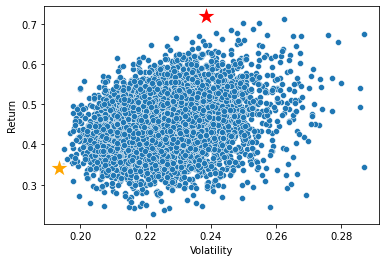

In [118]:
# Plot Return-Volatility and sigg the Max Sharp ratio and  Global Minimum Volatility
sns.scatterplot(x="Volatility", y="Return", data=RandomPortfolio)
sns.scatterplot(x="Volatility", y="Return",data=RandomPortfolio.sort_values(by="Sharpe", ascending=False).iloc[0:1], 
                color="red", marker="*", s=500)
sns.scatterplot(x="Volatility", y="Return", data=RandomPortfolio.sort_values(by="Volatility").iloc[0:1], 
                color="orange", marker="*", s=500)

In [119]:
# Print the range of Sharpe ratios
print(RandomPortfolio['Sharpe'].describe()[['min', 'max']])

RandomPortfolio.iloc[0,0:9].sum()
RandomPortfolio

min    0.479636
max    2.508219
Name: Sharpe, dtype: float64


,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS,Return,Volatility,Sharpe
0,0.015232,0.178975,0.037762,0.019064,0.181553,0.079247,0.073883,0.072650,0.176639,0.164994,0.394460,0.235158,1.167129
1,0.022460,0.100601,0.044026,0.049032,0.057808,0.134842,0.084863,0.230426,0.220934,0.055008,0.352127,0.224262,1.035072
2,0.025054,0.116527,0.103579,0.115837,0.092275,0.133385,0.088288,0.062017,0.125612,0.137427,0.504076,0.215534,1.781974
3,0.107746,0.113979,0.116720,0.016291,0.174056,0.104171,0.097688,0.068342,0.029098,0.171910,0.462049,0.223927,1.527502
4,0.043970,0.131536,0.142874,0.133972,0.106197,0.098097,0.109686,0.021353,0.096918,0.115398,0.502615,0.215972,1.771598
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.084916,0.137010,0.173022,0.095110,0.100456,0.147492,0.075373,0.011581,0.033741,0.141299,0.545803,0.210866,2.019302
4996,0.081812,0.074494,0.116621,0.085558,0.155017,0.161562,0.099415,0.021969,0.078444,0.125107,0.536680,0.221162,1.884051
4997,0.020403,0.003944,0.198234,0.157711,0.092541,0.078952,0.205977,0.109775,0.104427,0.028038,0.435385,0.214932,1.467373
4998,0.133445,0.112992,0.155956,0.049259,0.138754,0.131422,0.020683,0.109879,0.109352,0.038259,0.410472,0.221954,1.308708


In [120]:
#return_daily=portfolio.pct_change()

In [140]:
# Sort the portfolios by Sharpe ratio
sorted_portfolios = RandomPortfolio.sort_values(by=['Sharpe'], ascending=False)
# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, 0:10]
# Cast the MSR weights as a numpy array
MSR_weights_array = np.array(MSR_weights)
# Calculate the MSR portfolio returns
return_daily['Portfolio_MSR'] = return_daily.iloc[:, 0:10].mul(MSR_weights_array, axis=1).sum(axis=1)

MSR_port_ret=return_daily["Portfolio_MSR"].sum()
print("MSR weights", pd.DataFrame(MSR_weights))
print("Maximum Sharp Ratio Portfolio Return = " ,MSR_port_ret)

MSR weights               2881
AKBNK.IS  0.041424
AKSEN.IS  0.146689
BIMAS.IS  0.065819
DOAS.IS   0.180780
ETILR.IS  0.015930
GUBRF.IS  0.258601
KOZAL.IS  0.095525
SISE.IS   0.046832
THYAO.IS  0.000537
TOASO.IS  0.147863
Maximum Sharp Ratio Portfolio Return =  0.7185537367370359


In [143]:
# Sort the portfolios by volatility
sorted_portfolios = RandomPortfolio.sort_values(by=['Volatility'])
# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0, 0:10]
# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)
# Calculate the MSR portfolio returns
return_daily['Portfolio_GMV'] = return_daily.iloc[:, 0:10].mul(GMV_weights_array, axis=1).sum(axis=1)

GMV_port_ret=return_daily["Portfolio_GMV"].sum()
print("GMV weights", pd.DataFrame(GMV_weights))
print("Minimum Global Volatility Portfolio Return = " ,GMV_port_ret)

GMV weights               3962
AKBNK.IS  0.080016
AKSEN.IS  0.150985
BIMAS.IS  0.229375
DOAS.IS   0.004321
ETILR.IS  0.022440
GUBRF.IS  0.054431
KOZAL.IS  0.213074
SISE.IS   0.164208
THYAO.IS  0.014931
TOASO.IS  0.066219
Minimum Global Volatility Portfolio Return =  0.34198213745944894


In [125]:
return_daily.head()

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS,Portfolio_Ret,Portfolio_Ret_ew,Portfolio_Ret_mc,Portfolio_MSR,Portfolio_GMV
Date,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-02,-0.048035,-0.040892,-0.026057,-0.018433,-0.009434,-0.037037,-0.001986,-0.045217,-0.026087,-0.039076,-0.030280,-0.029225,-0.031947,-0.030863,-0.029127
2019-01-03,-0.012071,-0.019380,0.022592,-0.018779,0.000000,-0.059441,0.026866,-0.043716,-0.033801,-0.046211,-0.018839,-0.018394,-0.015443,-0.026954,-0.007045
2019-01-04,0.057762,0.031621,0.004651,0.002392,0.052381,0.007435,0.009690,-0.005714,-0.003960,0.012920,0.017593,0.016918,0.013023,0.013093,0.013976
2019-01-07,0.013652,0.000000,0.002894,0.000000,-0.027149,0.007380,0.029751,0.026820,-0.001988,0.040179,0.008788,0.009154,0.013454,0.012270,0.014923


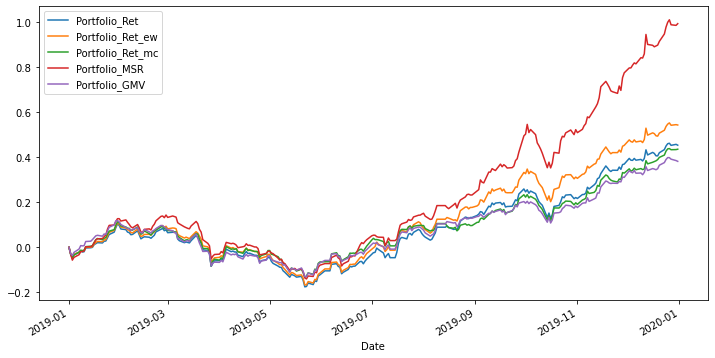

In [126]:
Cumulative_Returns=(1+return_daily).cumprod()-1
Cumulative_Returns[["Portfolio_Ret","Portfolio_Ret_ew","Portfolio_Ret_mc","Portfolio_MSR","Portfolio_GMV"]].plot(figsize=(12,6));

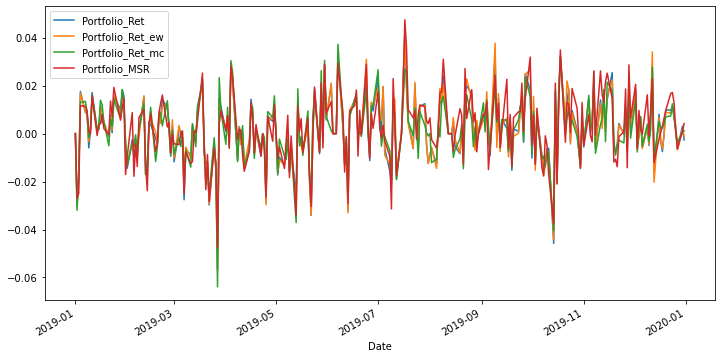

In [105]:
return_daily[["Portfolio_Ret","Portfolio_Ret_ew","Portfolio_Ret_mc","Portfolio_MSR"]].plot(figsize=(12,6));